In [4]:
import numpy as np, pandas as pd
import seaborn as sns
import RandomCov as rc
import HRP as hrp
import os, re
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 20]
plt.rcParams.update({'font.size': 22})

In [5]:
nCols = 20
nBlocks = 2
minBlockSize = 2

cov = rc.getRndBlockCov(nCols,nBlocks,minBlockSize=minBlockSize,sigma=1.,random_state=None)
cov = pd.DataFrame( cov )
hrp.plotCorrMatrix('./BlockCorr.png',rc.cov2corr(cov),labels=None)

RCRP                       0.004047
RCRP, no extended terms    0.004876
HRP                        0.006026
IVP                        0.007633
LW                         0.004000
OAS                        0.003999
dtype: float64


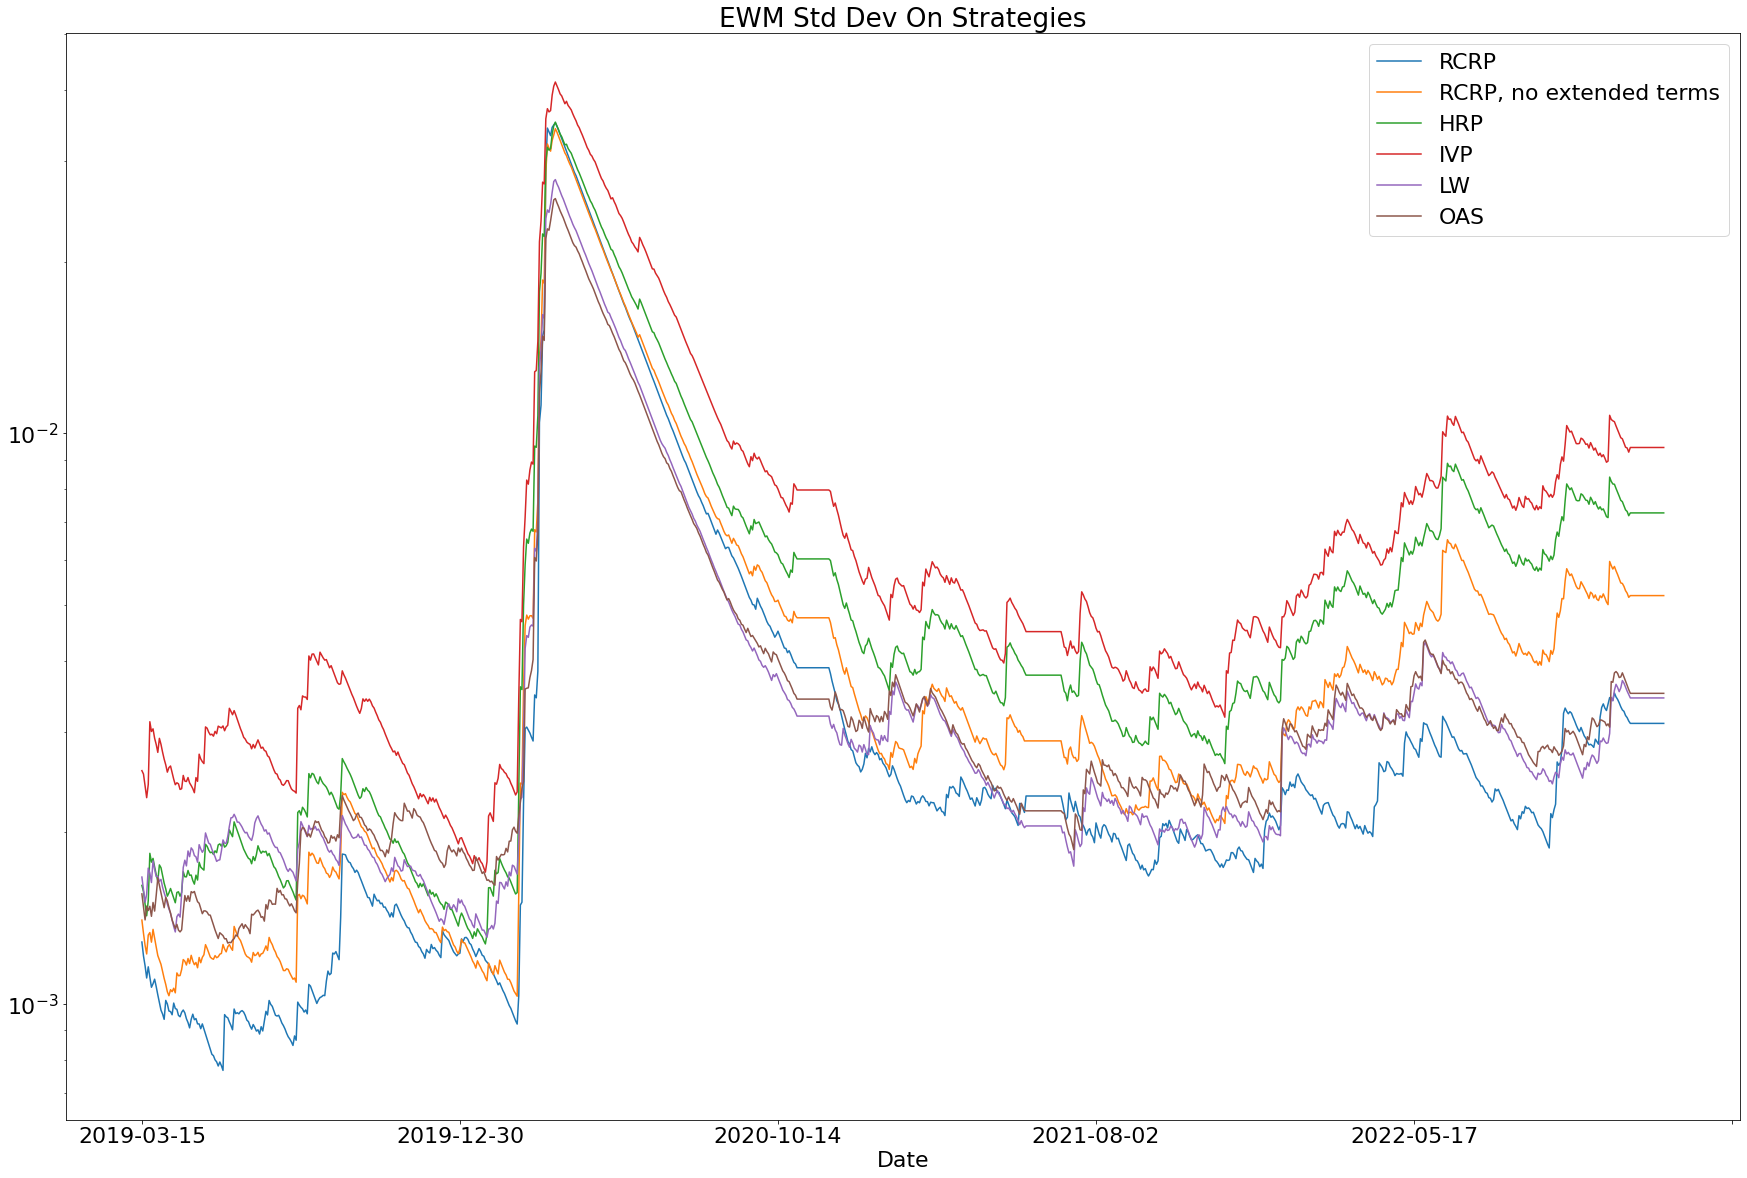

In [6]:
start = [x for x in os.listdir() if 'performance' in x and '.20' in x and 'csv' in x ]
dfs   = [ pd.read_csv( x ) for x in np.sort(start) ]
df    = pd.concat( dfs )
Vol = df.set_index('Date').ewm(halflife=20).std()
Vol.iloc[50:].plot(logy=True, title='EWM Std Dev On Strategies')
plt.savefig('image1.jpg')
print( Vol.iloc[50:].mean() )

RCRP                       1.000000
RCRP, no extended terms    1.356308
HRP                        1.805104
IVP                        2.369266
LW                         1.215175
OAS                        1.237109
dtype: float64


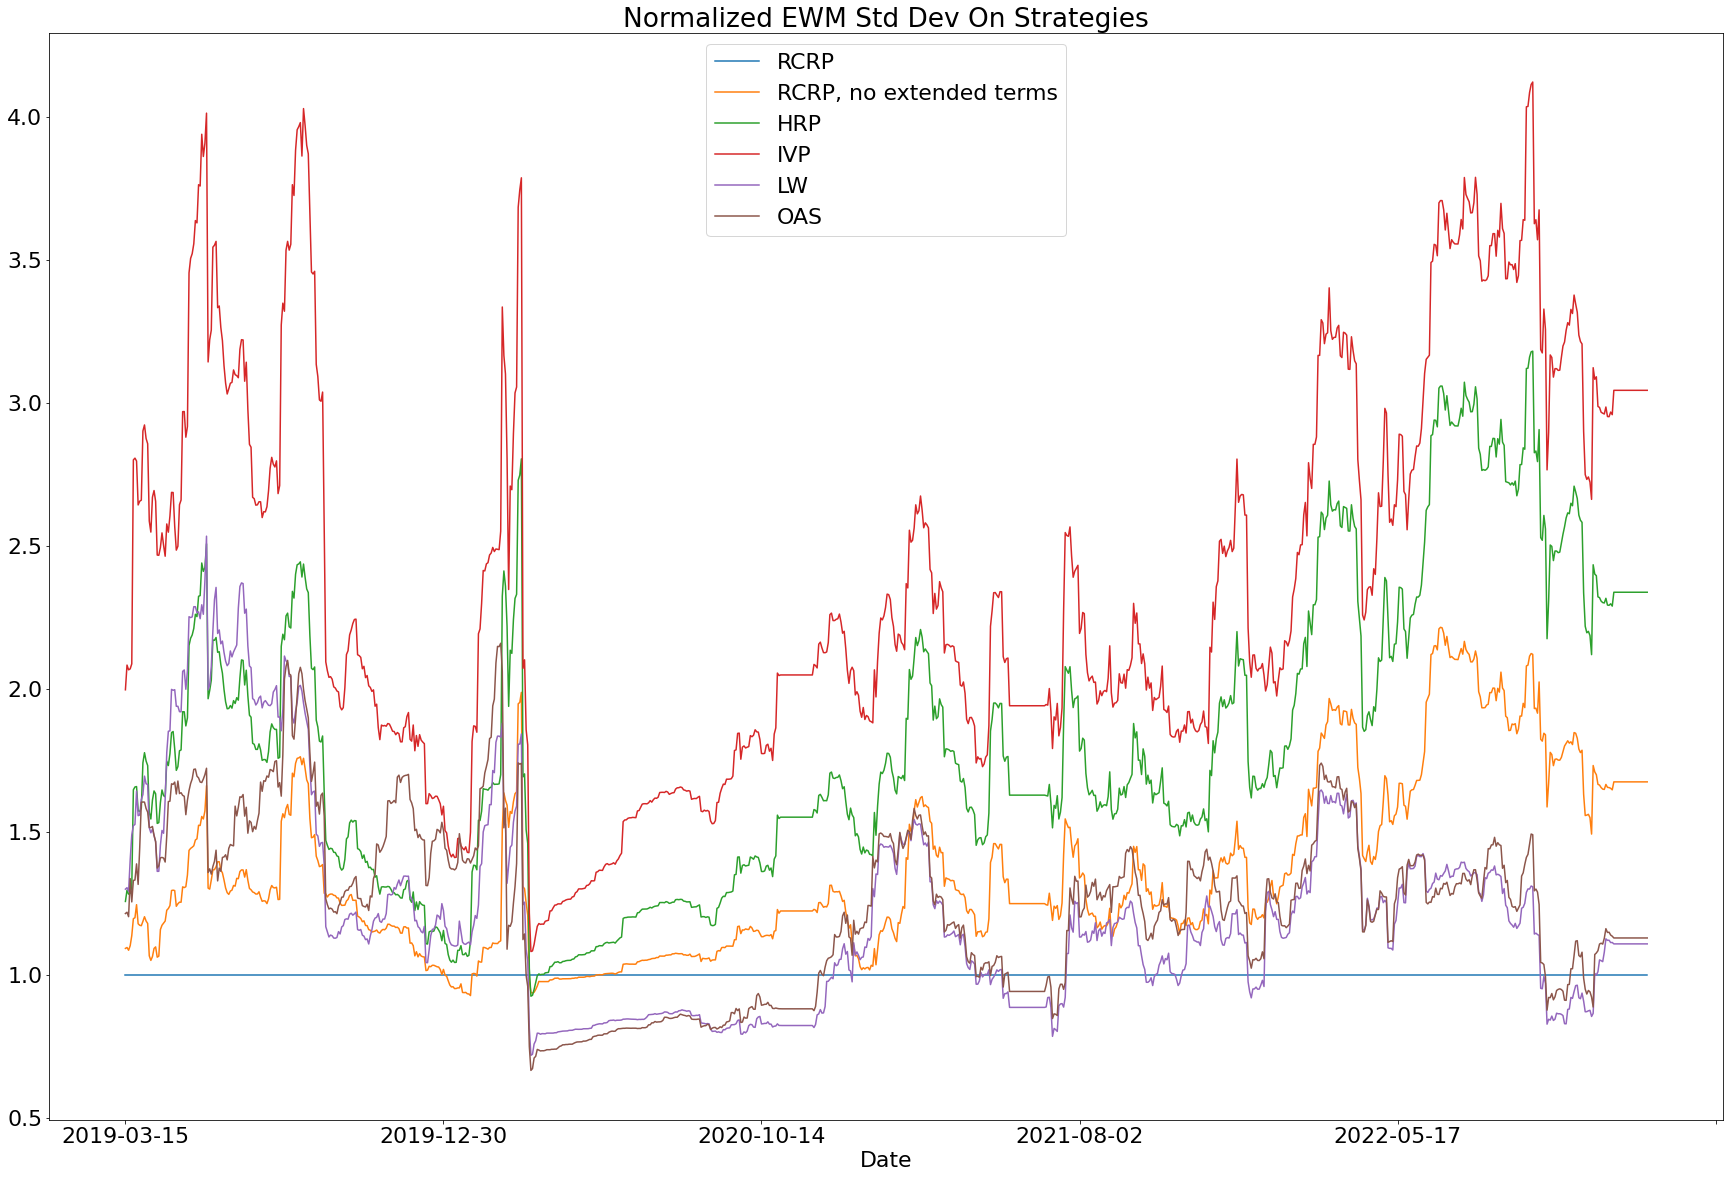

In [7]:
Norm_Vol = Vol.div( Vol['RCRP'], axis=0 )
Norm_Vol.iloc[50:].plot(logy=False, title='Normalized EWM Std Dev On Strategies')
plt.savefig('image2.jpg')
print( Norm_Vol.iloc[50:].mean() )

RCRP                        18.335760
RCRP, no extended terms     76.849105
HRP                        203.346176
IVP                        486.860181
LW                         129.103834
OAS                         62.957569
dtype: float64


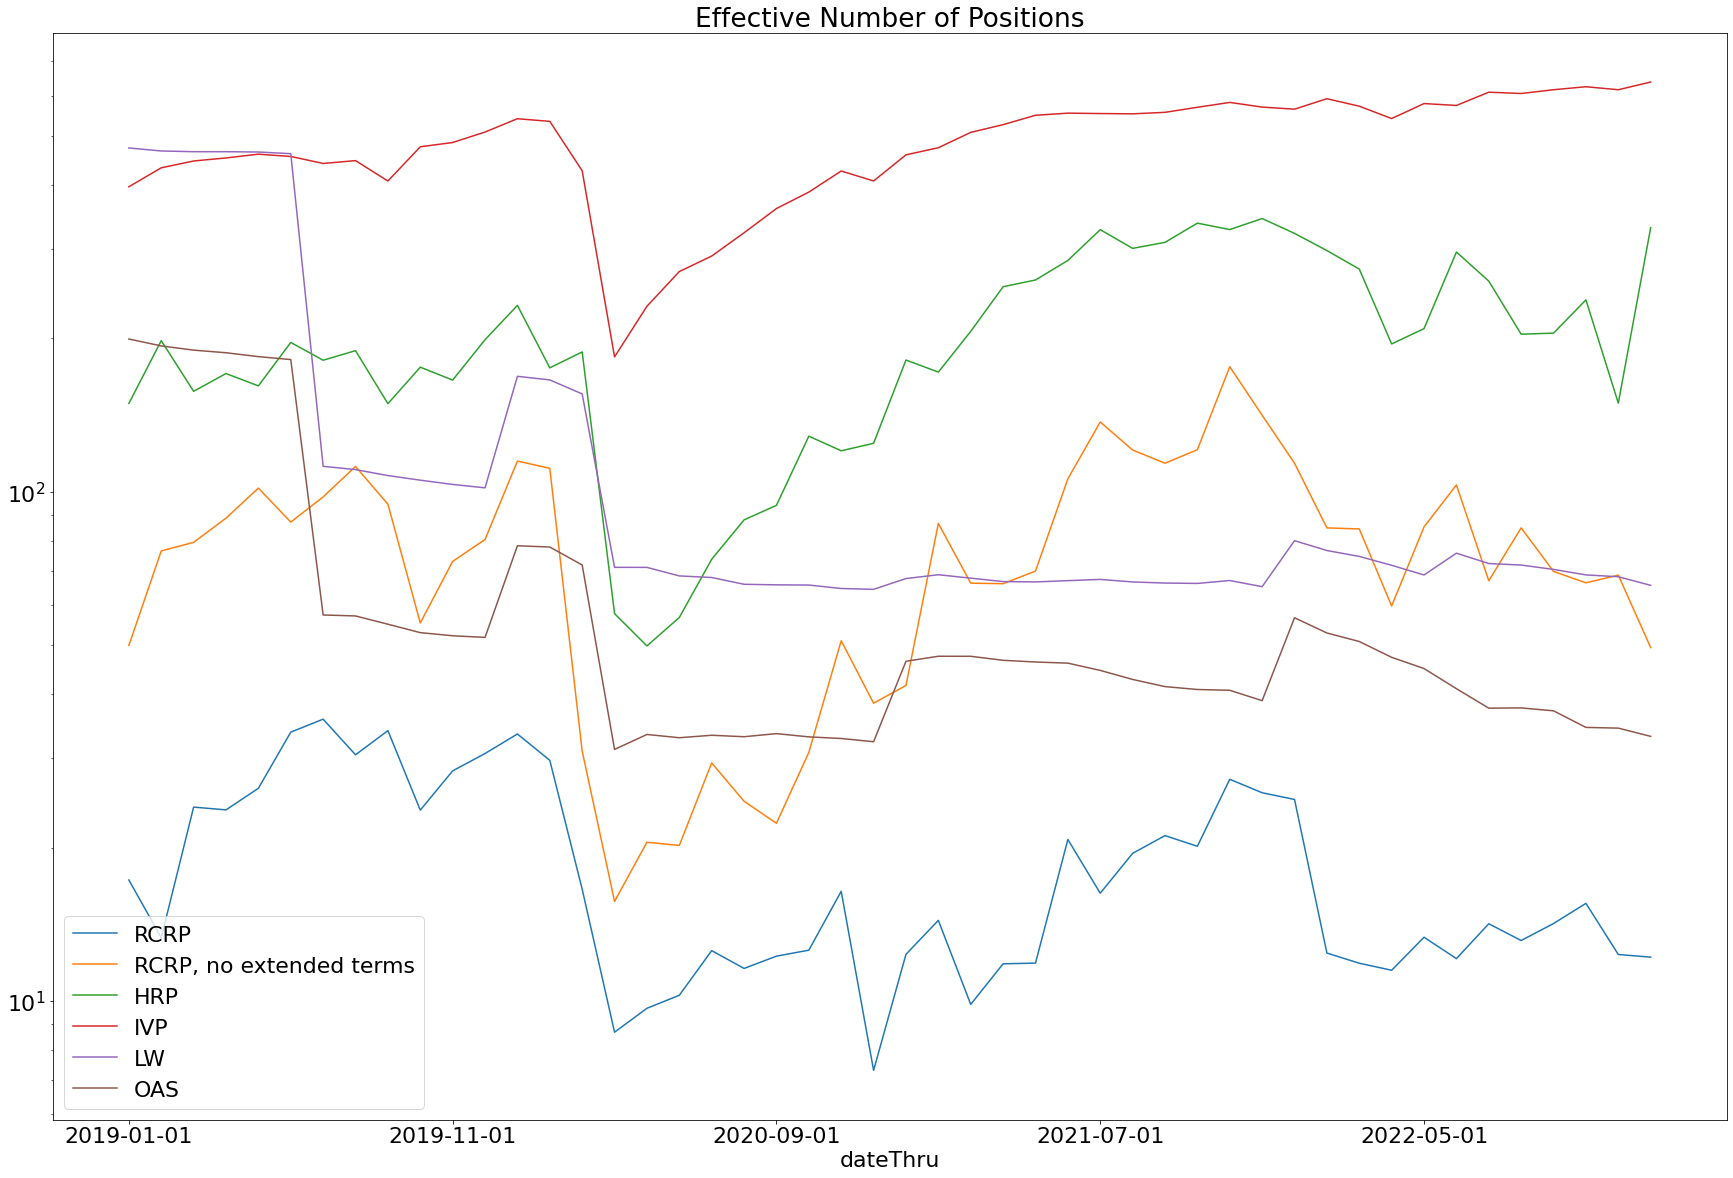

In [8]:
start = [x for x in os.listdir() if 'weights' in x and '.20' in x and 'csv' in x ]
dfs   = [ pd.read_csv( x ) for x in np.sort(start) ]
df    = pd.concat( dfs )
Weight = df.drop(columns='Unnamed: 0').drop(columns='Company').set_index('dateThru')
EffN = ( Weight**2 ).reset_index().groupby('dateThru').sum().apply(lambda x: 1./x, axis=1)
EffN.plot(logy=True, title='Effective Number of Positions')
plt.savefig('image3.jpg')
print(EffN.mean())

RCRP                       0.140062
RCRP, no extended terms    0.069862
HRP                        0.032605
IVP                        0.011103
LW                         0.013462
OAS                        0.019869
dtype: float64


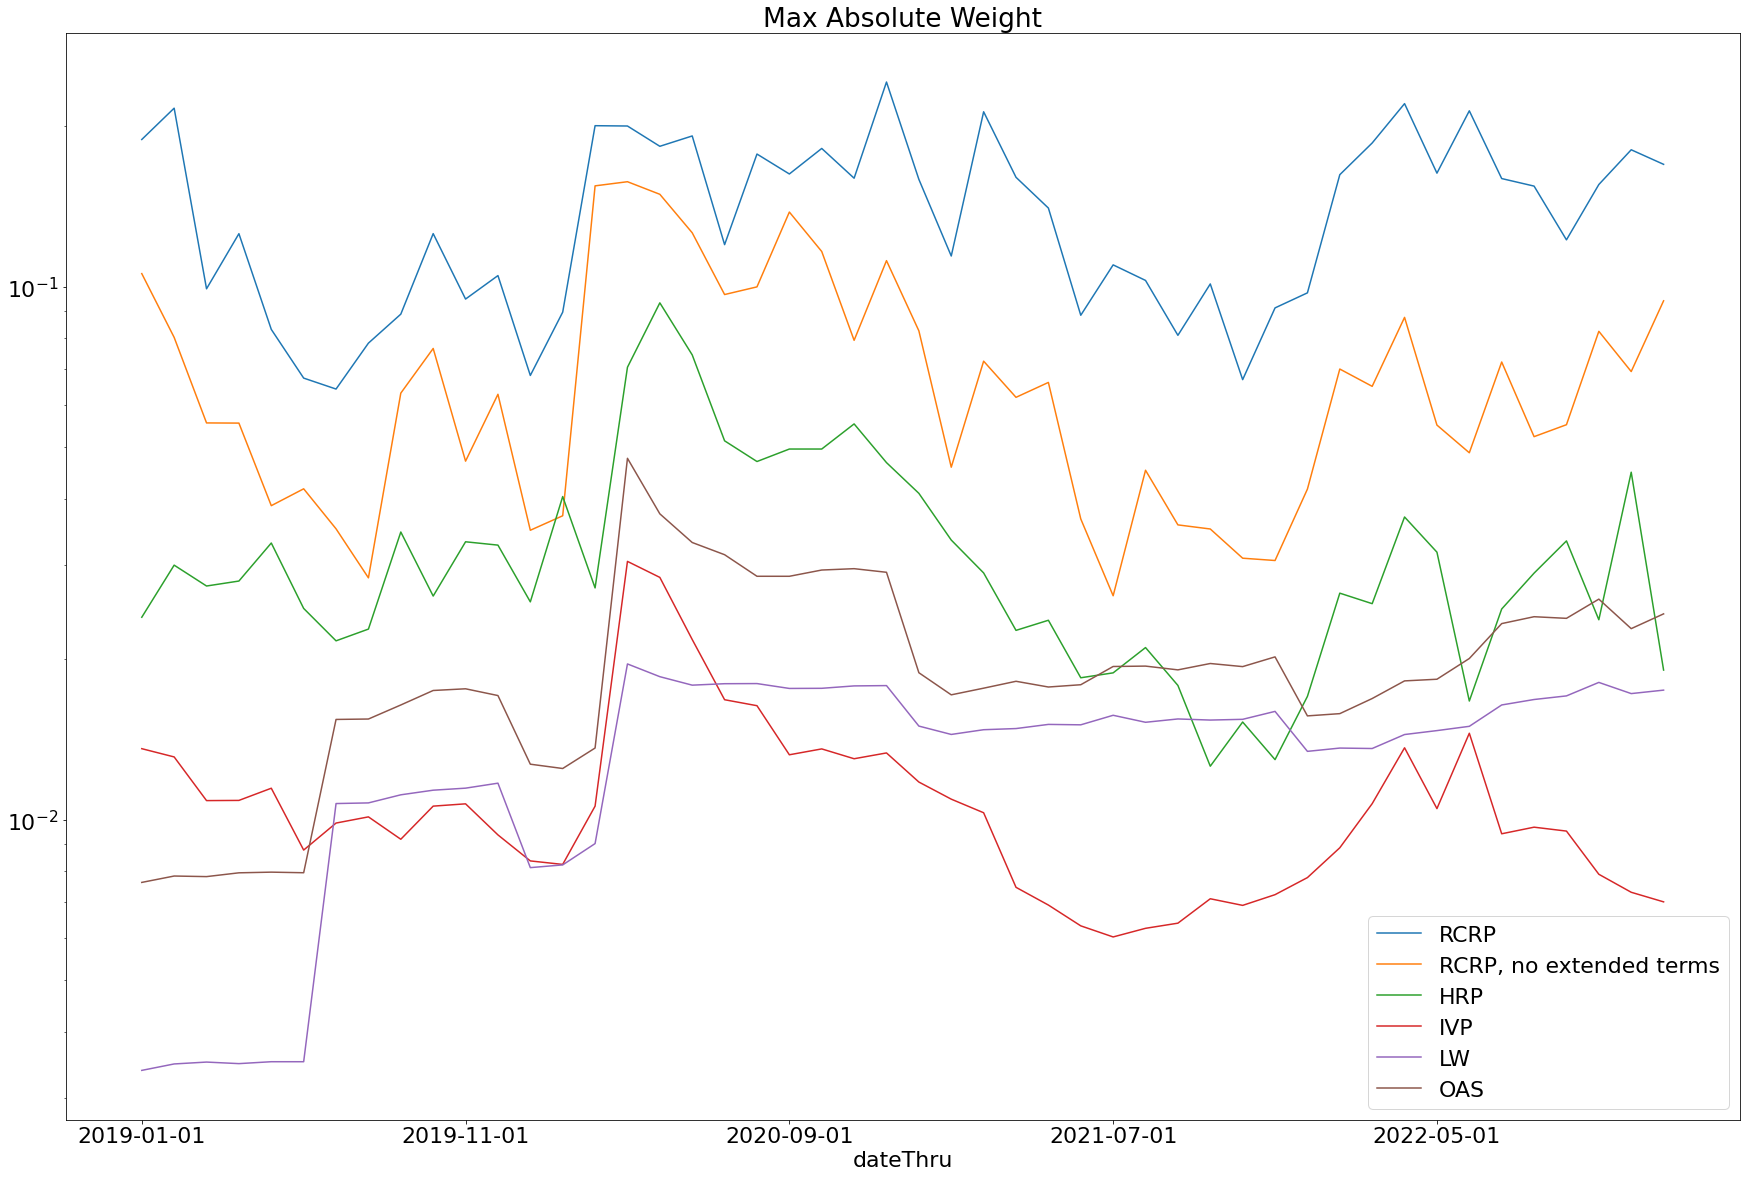

In [9]:
Max_Abs_Weight = Weight.abs().reset_index().groupby('dateThru').max()
Max_Abs_Weight.plot(logy=True, title='Max Absolute Weight')
plt.savefig('image4.jpg')
print(Max_Abs_Weight.mean())

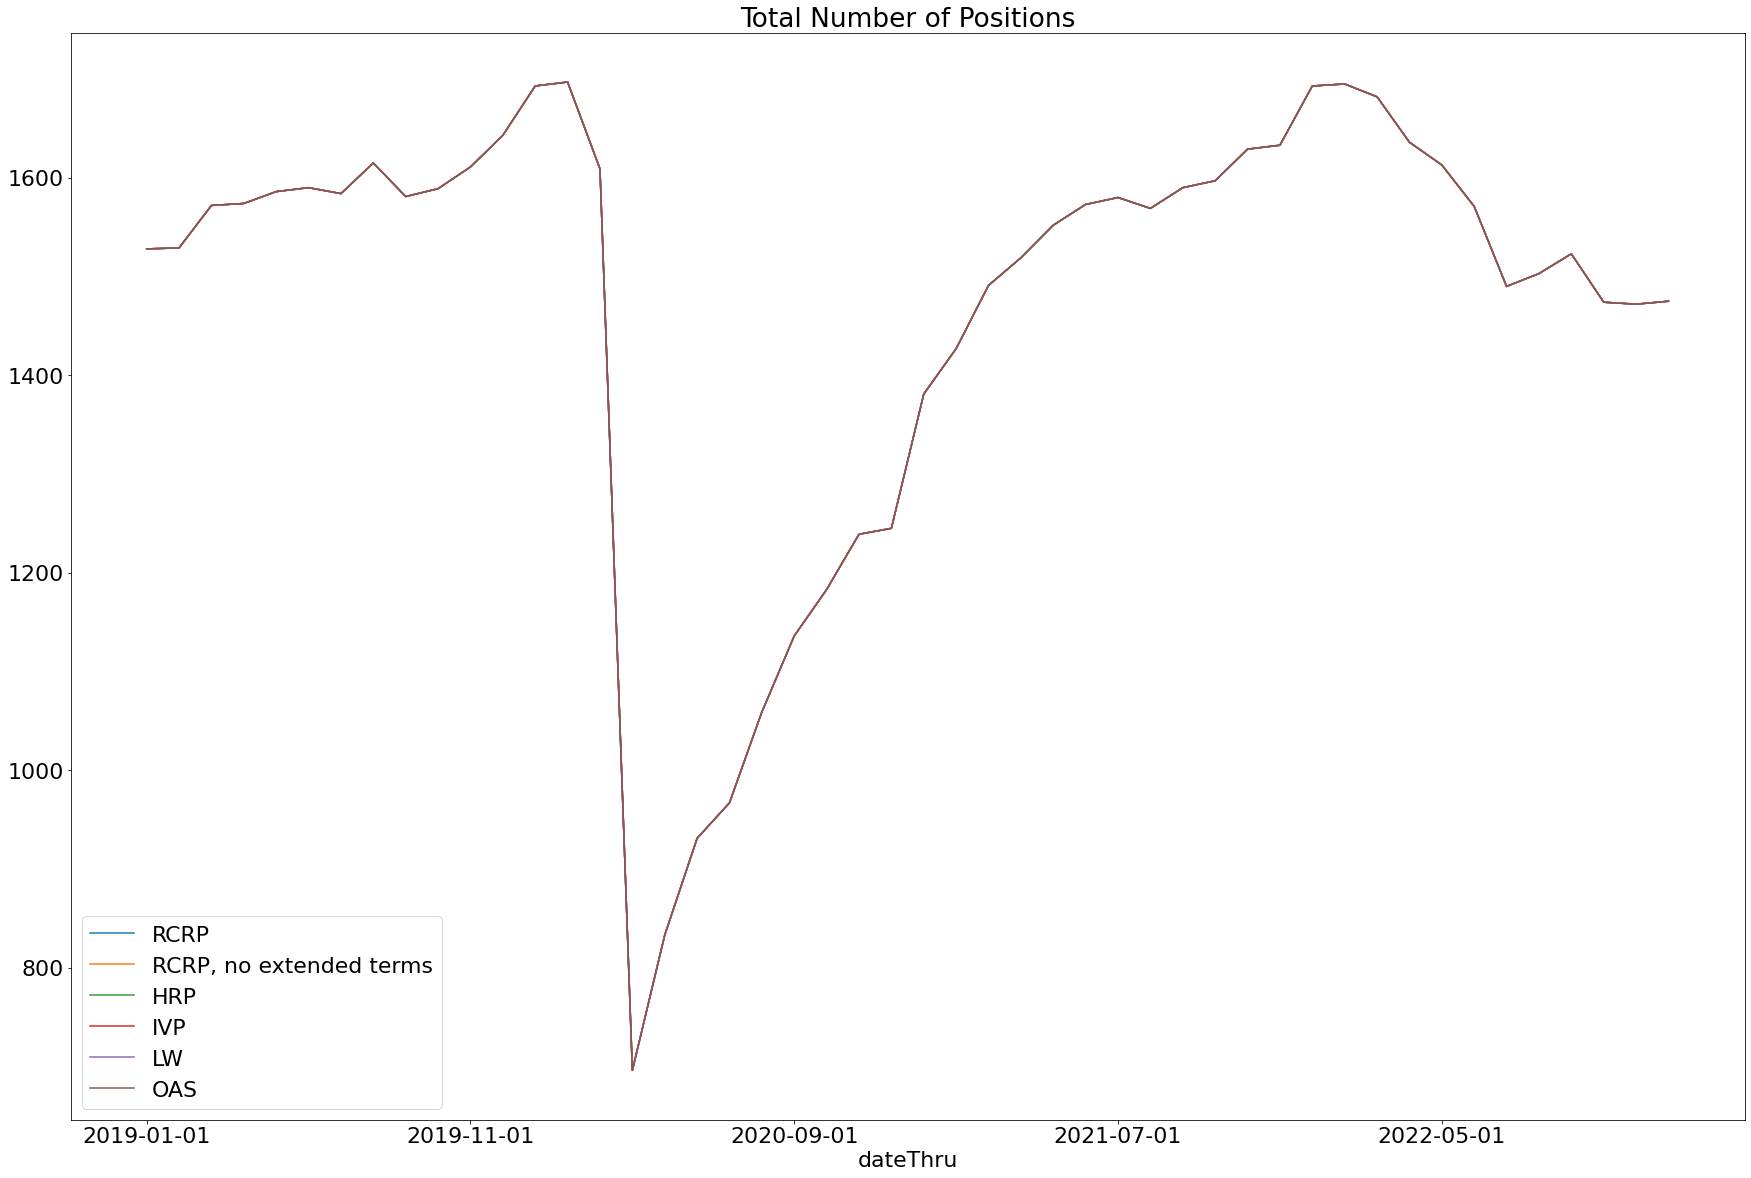

In [10]:
(Weight.abs() > 0).reset_index().groupby('dateThru').sum().plot(title='Total Number of Positions')
plt.savefig('image5.jpg')